In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRanker
from sklearn.metrics import  mean_squared_error
plt.style.use('fivethirtyeight')
color_pal=sns.color_palette()



In [3]:
#pip install xgboost


     ---------------------------------------- 70.9/70.9 MB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
data=pd.read_csv(r'C:\Users\ahmed\Desktop\Hourly Energy Consumption\Hourly-Energy-Consumption\PJME_hourly.csv')

In [31]:
data.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [17]:
data =data.set_index('Datetime')

In [29]:
data.index=pd.to_datetime(data.index)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


<AxesSubplot:xlabel='Datetime'>

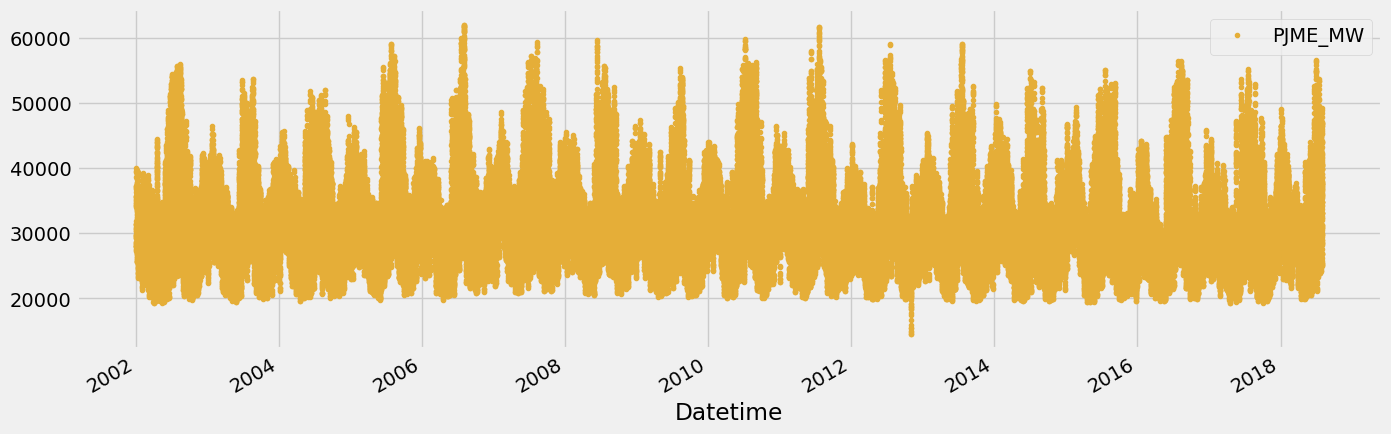

In [30]:
data.plot( 
    figsize=(15,5),
    color=color_pal[2],
    style='.',
    
)

In [39]:
data['hour']=data.index.hour
data['year']=data.index.year
data['dayofweek']=data.index.dayofweek
data['month']=data.index.month
data['quarter']=data.index.quarter
data['dayofyear']=data.index.dayofyear

In [40]:
data

,PJME_MW,hour,year,dayofweek,month,quarter,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,2002,1,12,4,365
2002-12-31 02:00:00,25147.0,2,2002,1,12,4,365
2002-12-31 03:00:00,24574.0,3,2002,1,12,4,365
2002-12-31 04:00:00,24393.0,4,2002,1,12,4,365
2002-12-31 05:00:00,24860.0,5,2002,1,12,4,365
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,2018,0,1,1,1
2018-01-01 21:00:00,43751.0,21,2018,0,1,1,1
2018-01-01 22:00:00,42402.0,22,2018,0,1,1,1


Text(0.5, 1.0, 'Energy usage by Hour')

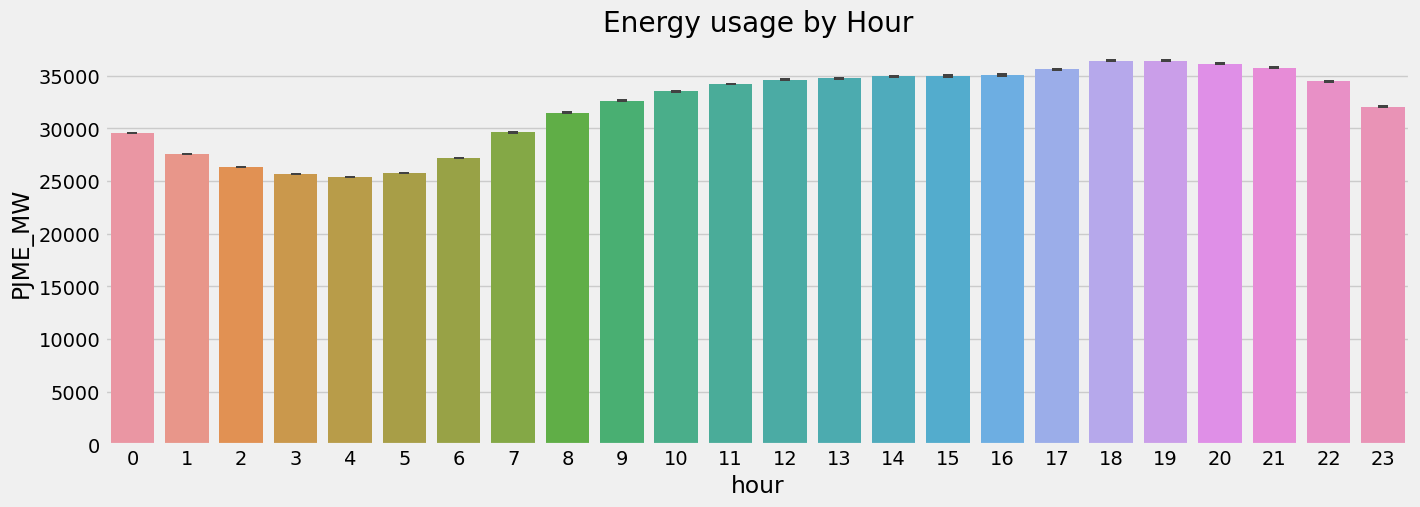

In [50]:
plt.subplots(figsize=(15,5))
sns.barplot(data=data,x='hour',y='PJME_MW')
plt.title('Energy usage by Hour')


Text(0.5, 1.0, 'Energy usage by year')

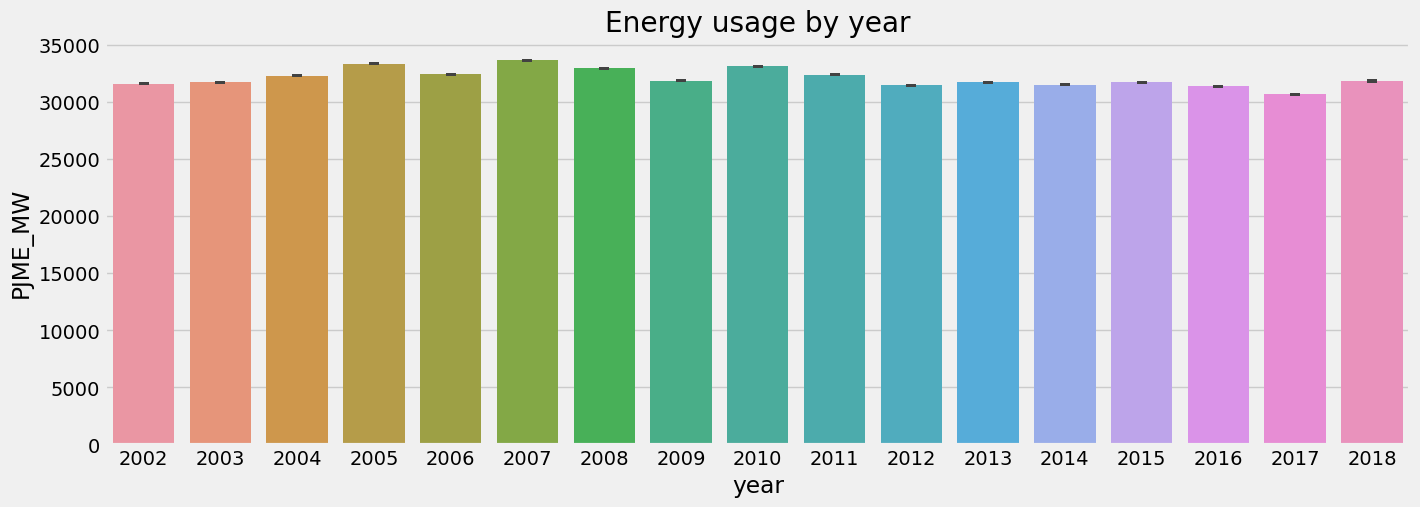

In [55]:
plt.subplots(figsize=(15,5))
sns.barplot(data=data,x='year',y='PJME_MW')
plt.title('Energy usage by year')

Text(0.5, 1.0, 'Energy usage by month')

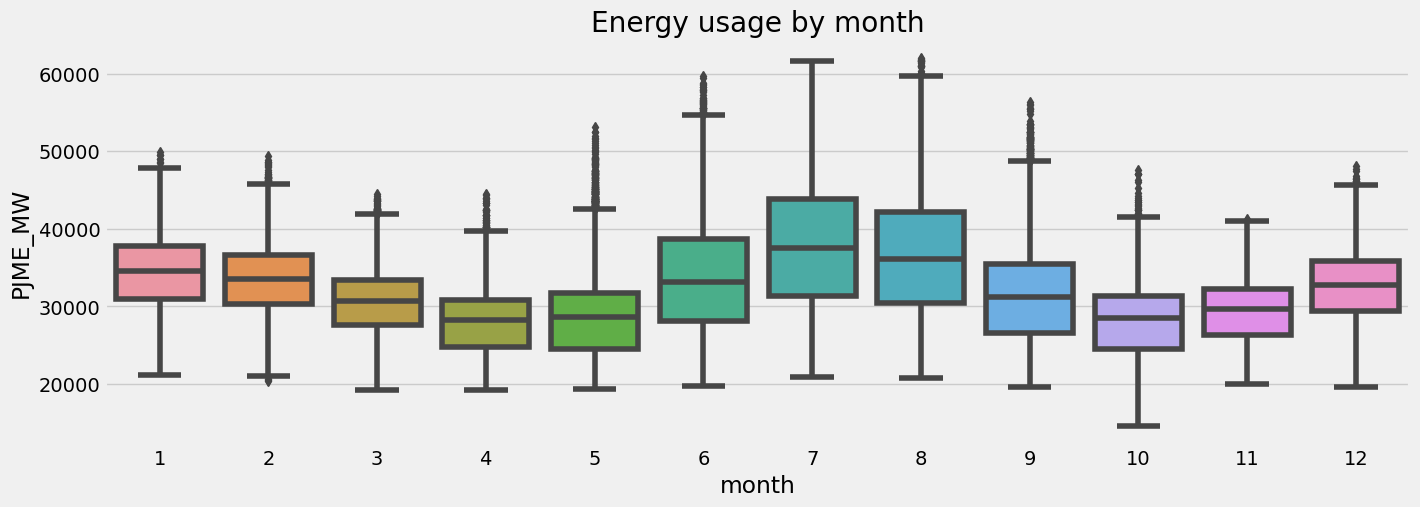

In [53]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=data,x='month',y='PJME_MW')
plt.title('Energy usage by month')

Text(0.5, 1.0, 'Energy usage by quarter')

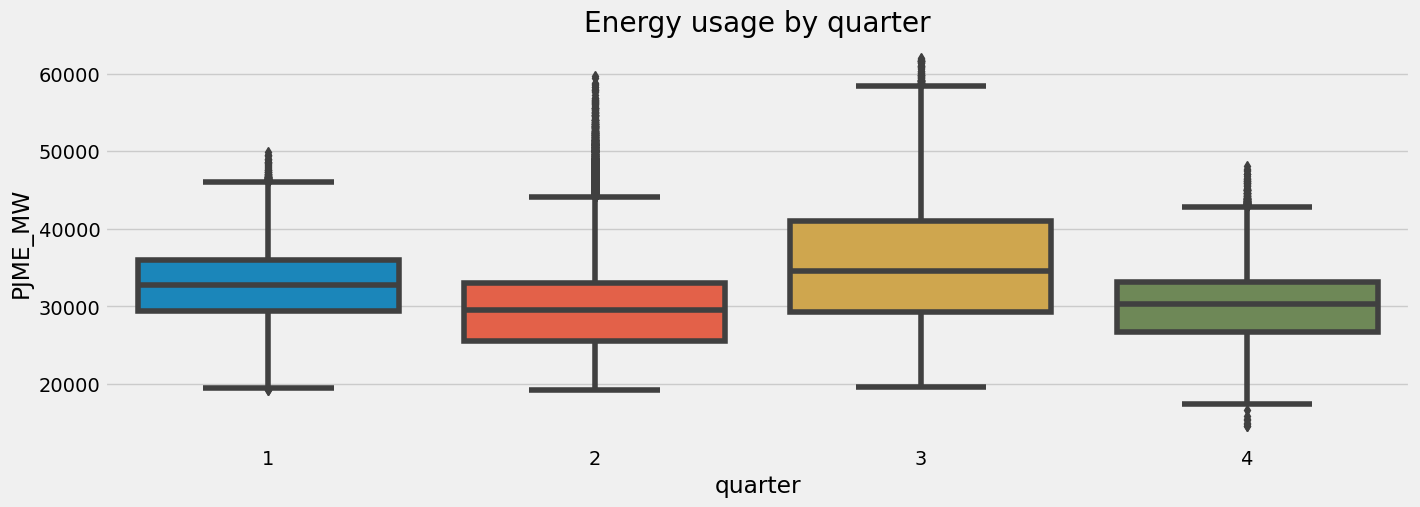

In [57]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=data,x='quarter',y='PJME_MW')
plt.title('Energy usage by quarter')

In [58]:
train_set=data.loc[data.index<'01-01-2015']
test_set=data.loc[data.index>='01-01-2015']

In [61]:
train_set

,PJME_MW,hour,year,dayofweek,month,quarter,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,2002,1,12,4,365
2002-12-31 02:00:00,25147.0,2,2002,1,12,4,365
2002-12-31 03:00:00,24574.0,3,2002,1,12,4,365
2002-12-31 04:00:00,24393.0,4,2002,1,12,4,365
2002-12-31 05:00:00,24860.0,5,2002,1,12,4,365
...,...,...,...,...,...,...,...
2014-01-01 20:00:00,36193.0,20,2014,2,1,1,1
2014-01-01 21:00:00,35601.0,21,2014,2,1,1,1
2014-01-01 22:00:00,34242.0,22,2014,2,1,1,1


Text(0.5, 1.0, 'test_Test_sets')

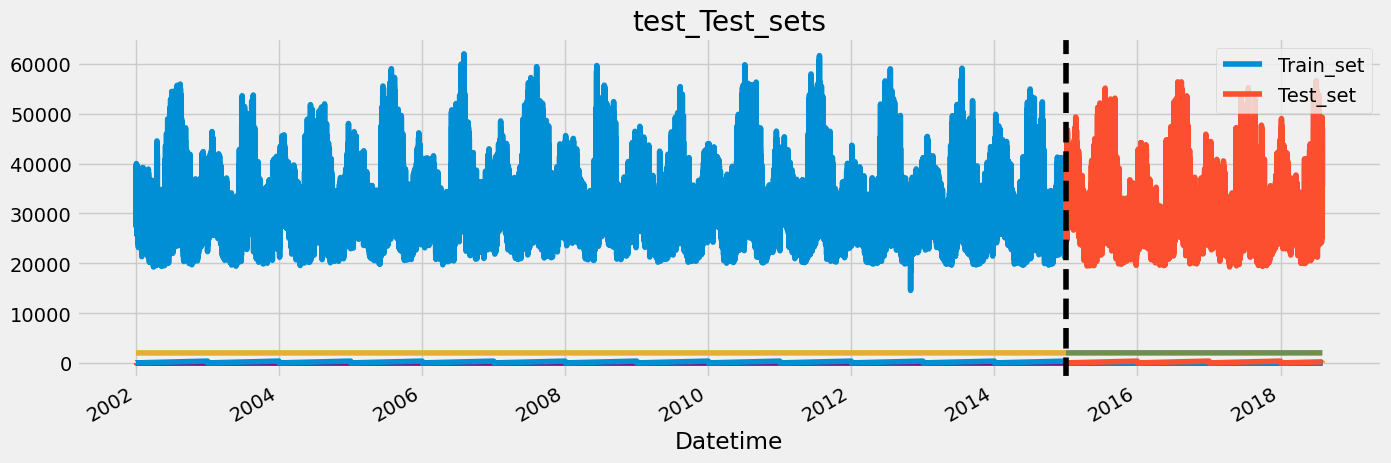

In [87]:
fig,ax=plt.subplots(figsize=(15,5))
train_set.plot(ax=ax)
test_set.plot(ax=ax)
ax.axvline('01-01-2015',color='black',ls='--')
plt.legend(['Train_set','Test_set'])
plt.title('test_Test_sets')

In [88]:
data

,PJME_MW,hour,year,dayofweek,month,quarter,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,2002,1,12,4,365
2002-12-31 02:00:00,25147.0,2,2002,1,12,4,365
2002-12-31 03:00:00,24574.0,3,2002,1,12,4,365
2002-12-31 04:00:00,24393.0,4,2002,1,12,4,365
2002-12-31 05:00:00,24860.0,5,2002,1,12,4,365
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,2018,0,1,1,1
2018-01-01 21:00:00,43751.0,21,2018,0,1,1,1
2018-01-01 22:00:00,42402.0,22,2018,0,1,1,1


In [89]:
x_train=train_set.drop('PJME_MW',axis=1)
y_train=train_set['PJME_MW']

x_test=test_set.drop('PJME_MW',axis=1)
y_test=test_set['PJME_MW']

In [94]:
y_train

Datetime
2002-12-31 01:00:00    26498.0
2002-12-31 02:00:00    25147.0
2002-12-31 03:00:00    24574.0
2002-12-31 04:00:00    24393.0
2002-12-31 05:00:00    24860.0
                        ...   
2014-01-01 20:00:00    36193.0
2014-01-01 21:00:00    35601.0
2014-01-01 22:00:00    34242.0
2014-01-01 23:00:00    32215.0
2014-01-02 00:00:00    30159.0
Name: PJME_MW, Length: 113926, dtype: float64

In [99]:
from xgboost import XGBRegressor

model=XGBRegressor(n_estimator=100,early_stopping_round=50)

In [101]:
model.fit(x_train,y_train)

[20:42:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "early_stopping_round", "n_estimator" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_round=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimator=100, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [102]:
model.score(x_train,y_train)

0.9339877047391292

In [104]:
y_pre=model.predict(x_test)

In [107]:
mean_e=mean_squared_error(y_pre,y_test)

In [108]:
np.sqrt(mean_e)

4282.025025556161